# UK  road accidents and safety data

### Description

Data contains information about the circumstances of personal injury road accidents in Great Britain in 2014. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. Information on damage-only accidents, with no human casualties or accidents on private roads or car parks are not included in this data.

### Importing the data

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.utils.multiclass import unique_labels
import time
import matplotlib


plt.style.use("dark_background")
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("husl"))

In [2]:
df_acc= pd.read_csv('data/DfTRoadSafety_Accidents_2014.csv')
df_acc

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       201401BS70001                 524600                  179020   
1       201401BS70002                 525780                  178290   
2       201401BS70003                 526880                  178430   
3       201401BS70004                 525580                  179080   
4       201401BS70006                 527040                  179030   
5       201401BS70008                 524750                  178970   
6       201401BS70009                 524950                  179240   
7       201401BS70010                 523850                  181450   
8       201401BS70011                 524500                  180260   
9       201401BS70013                 526450                  179230   
10      201401BS70014                 527430                  179330   
11      201401BS70015                 526130                  179650   
12      201401BS70016                 525330                  181090   
13      201401BS70017                 525420                  178320   
14      201401BS70018                 525090                  180140   
15      201401BS70020                 526050                  177810   
16      201401BS70022                 526760                  178290   
17      201401BS70023                 525400                  180100   
18      201401BS70024                 523910                  179940   
19      201401BS70025                 525720                  179660   
20      201401BS70026                 526820                  177800   
21      201401BS70027                 525410                  178070   
22      201401BS70028                 525960                  177690   
23      201401BS70029                 525940                  179690   
24      201401BS70030                 526670                  177870   
25      201401BS70032                 525590                  178180   
26      201401BS70033                 525020                  178620   
27      201401BS70034                 525720                  178720   
28      201401BS70035                 524380                  180100   
29      201401BS70036                 528100                  178330   
...               ...                    ...                     ...   
146292  2014984128614                 336437                  584514   
146293  2014984128714                 306125                  611710   
146294  2014984128914                 325289                  597863   
146295  2014984129114                 319389                  566583   
146296  2014984129514                 306080                  592135   
146297  2014984129614                 313234                  607312   
146298  2014984129714                 319365                  566417   
146299  2014984130114                 315856                  572489   
146300  2014984130714                 306666                  604698   
146301  2014984131014                 330751                  567482   
146302  2014984131214                 306950                  604084   
146303  2014984131414                 319519                  566948   
146304  2014984131714                 313707                  580203   
146305  2014984132014                 316784                  568053   
146306  2014984132714                 310347                  594369   
146307  2014984133414                 319657                  566553   
146308  2014984133514                 312209                  580958   
146309  2014984133714                 319487                  566721   
146310  2014984133914                 310318                  590421   
146311  2014984134314                 311812                  580747   
146312  2014984134614                 312649                  583604   
146313  2014984134914                 316306                  568290   
146314  2014984135714                 311115                  574365   
146315  2014984135914                 328339   

In [3]:
# check the Accident_Index is unique
len(df_acc.Accident_Index.unique())

146322

## Exploring the data

The -1's in the data correspond to NULL values, let's substitute and check for nulls

In [4]:
#first check if there are -1's in a string format 
df_acc.eq('-1').sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [5]:
#next check how many -1's are in the data and in which columns prediominantly
df_acc.eq(-1).sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [6]:
# replace and check the replacemnet was correct
df_acc.replace(-1,np.nan, inplace=True)
df_acc.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

The response variable does not have missing data, and there does not seemt to be bad data quality issues except in few columns. Let's chek the data balance:

In [7]:
#Check the third option is abscent 
#from the response variable (as noted in the variable description)
df_acc.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array([2, 1])

In [156]:
# replace 2 with 0 for police not showing up 
df_acc.Did_Police_Officer_Attend_Scene_of_Accident.replace(2,0, inplace=True)

#check the imbalance
print (df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(1).sum(),
       df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum())
print ('Police attended in the {}% of cases'.
       format(round((df_acc.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum()/
                     len(df_acc))*100)))

119607 26715
Police attended in the 18.0% of cases


In [9]:
#Create the date time column
df_acc['dt'] = pd.to_datetime(df_acc.Date+' '+df_acc.Time)

In [10]:
df_acc['Month'] = df_acc.dt.dt.month 
df_acc['Hour'] = df_acc.dt.dt.hour
df_acc

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       201401BS70001                 524600                  179020   
1       201401BS70002                 525780                  178290   
2       201401BS70003                 526880                  178430   
3       201401BS70004                 525580                  179080   
4       201401BS70006                 527040                  179030   
5       201401BS70008                 524750                  178970   
6       201401BS70009                 524950                  179240   
7       201401BS70010                 523850                  181450   
8       201401BS70011                 524500                  180260   
9       201401BS70013                 526450                  179230   
10      201401BS70014                 527430                  179330   
11      201401BS70015                 526130                  179650   
12      201401BS70016                 525330                  181090   
13      201401BS70017                 525420                  178320   
14      201401BS70018                 525090                  180140   
15      201401BS70020                 526050                  177810   
16      201401BS70022                 526760                  178290   
17      201401BS70023                 525400                  180100   
18      201401BS70024                 523910                  179940   
19      201401BS70025                 525720                  179660   
20      201401BS70026                 526820                  177800   
21      201401BS70027                 525410                  178070   
22      201401BS70028                 525960                  177690   
23      201401BS70029                 525940                  179690   
24      201401BS70030                 526670                  177870   
25      201401BS70032                 525590                  178180   
26      201401BS70033                 525020                  178620   
27      201401BS70034                 525720                  178720   
28      201401BS70035                 524380                  180100   
29      201401BS70036                 528100                  178330   
...               ...                    ...                     ...   
146292  2014984128614                 336437                  584514   
146293  2014984128714                 306125                  611710   
146294  2014984128914                 325289                  597863   
146295  2014984129114                 319389                  566583   
146296  2014984129514                 306080                  592135   
146297  2014984129614                 313234                  607312   
146298  2014984129714                 319365                  566417   
146299  2014984130114                 315856                  572489   
146300  2014984130714                 306666                  604698   
146301  2014984131014                 330751                  567482   
146302  2014984131214                 306950                  604084   
146303  2014984131414                 319519                  566948   
146304  2014984131714                 313707                  580203   
146305  2014984132014                 316784                  568053   
146306  2014984132714                 310347                  594369   
146307  2014984133414                 319657                  566553   
146308  2014984133514                 312209                  580958   
146309  2014984133714                 319487                  566721   
146310  2014984133914                 310318                  590421   
146311  2014984134314                 311812                  580747   
146312  2014984134614                 312649                  583604   
146313  2014984134914                 316306                  568290   
146314  2014984135714                 311115                  574365   
146315  2014984135914                 328339   

#### Accident Severity

Count
Fatal      1658
Serious   20676
Slight   123988

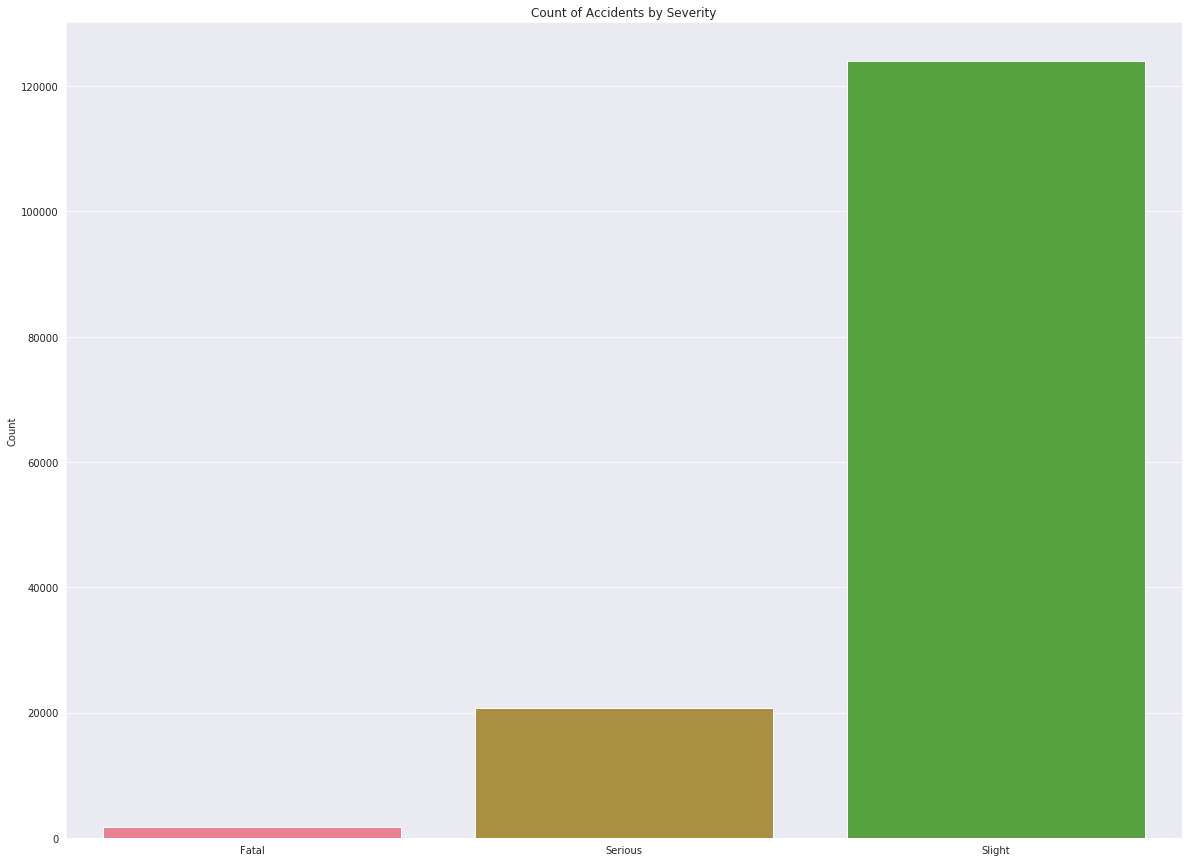

In [95]:
severeity=pd.DataFrame.from_dict(
    {'Fatal':df_acc.Accident_Severity.value_counts()[1],
             'Serious':df_acc.Accident_Severity.value_counts()[2], 
             'Slight':df_acc.Accident_Severity.value_counts()[3]},
    orient='index', columns=['Count'])

plt.figure(2, figsize=(20,15))
sns.barplot(x=severeity.index, y='Count',data=severeity)
plt.title('Count of Accidents by Severity')

severeity


In [96]:
sever_by_attend=df_acc.replace({'Accident_Severity':{1:'Fatal',2:'Serious',3:'Slight'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Accident_Severity', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=sever_by_attend)
plt.ylabel("Count")
plt.title('Count of Accidents by Severity')

sever_by_attend

Accident_Severity Did_Police_Officer_Attend_Scene_of_Accident  \
0             Fatal                                          NO   
1             Fatal                                         YES   
2           Serious                                          NO   
3           Serious                                         YES   
4            Slight                                          NO   
5            Slight                                         YES   

   Accident_Index  
0              20  
1            1638  
2            1941  
3           18735  
4           24754  
5           99234

Text(0.5, 1.0, 'Percentage of Police Not Attending by Accident Severity')

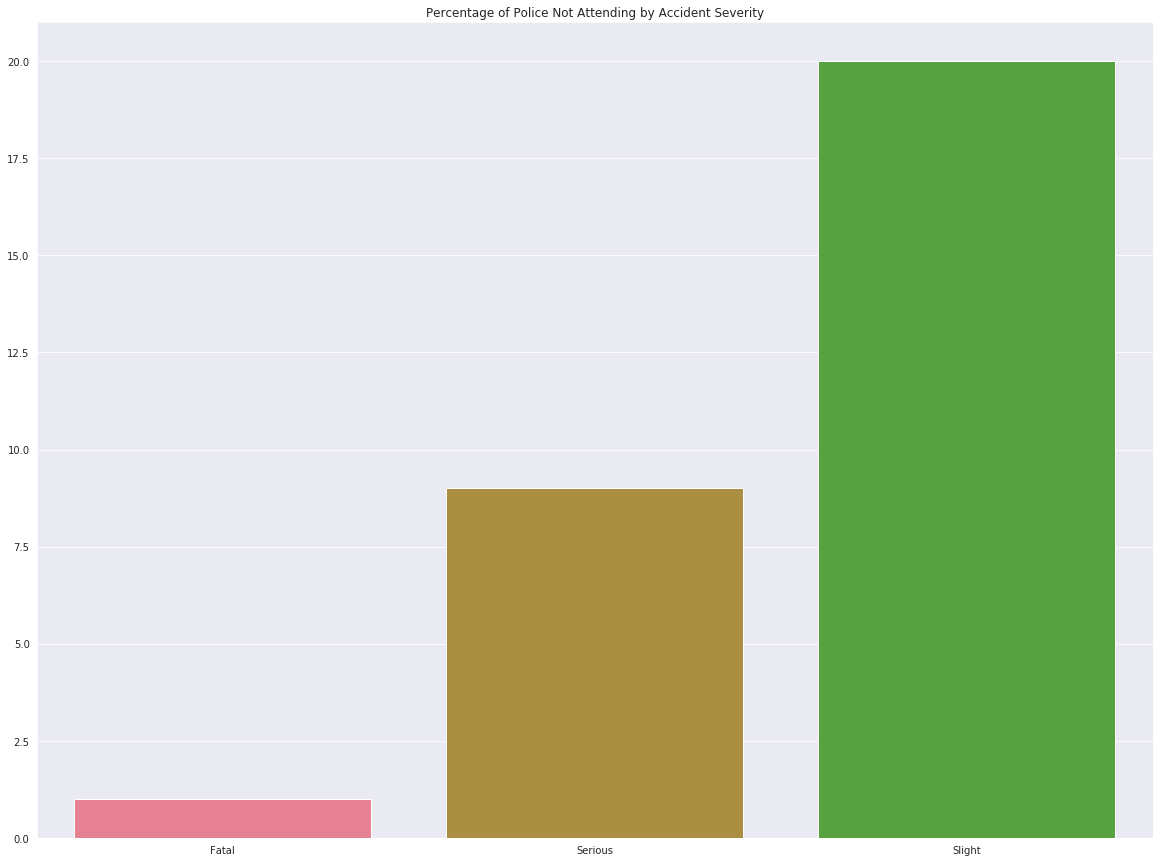

In [89]:
a=np.round((np.array(sever_by_attend.loc[
    sever_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(sever_by_attend.loc[
    sever_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(sever_by_attend.loc[
     sever_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=sever_by_attend.Accident_Severity.unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Accident Severity")

#### Number of Casualties 

Text(0.5, 1.0, 'Histograms of Number of Casualties Attended vs Not Attended')

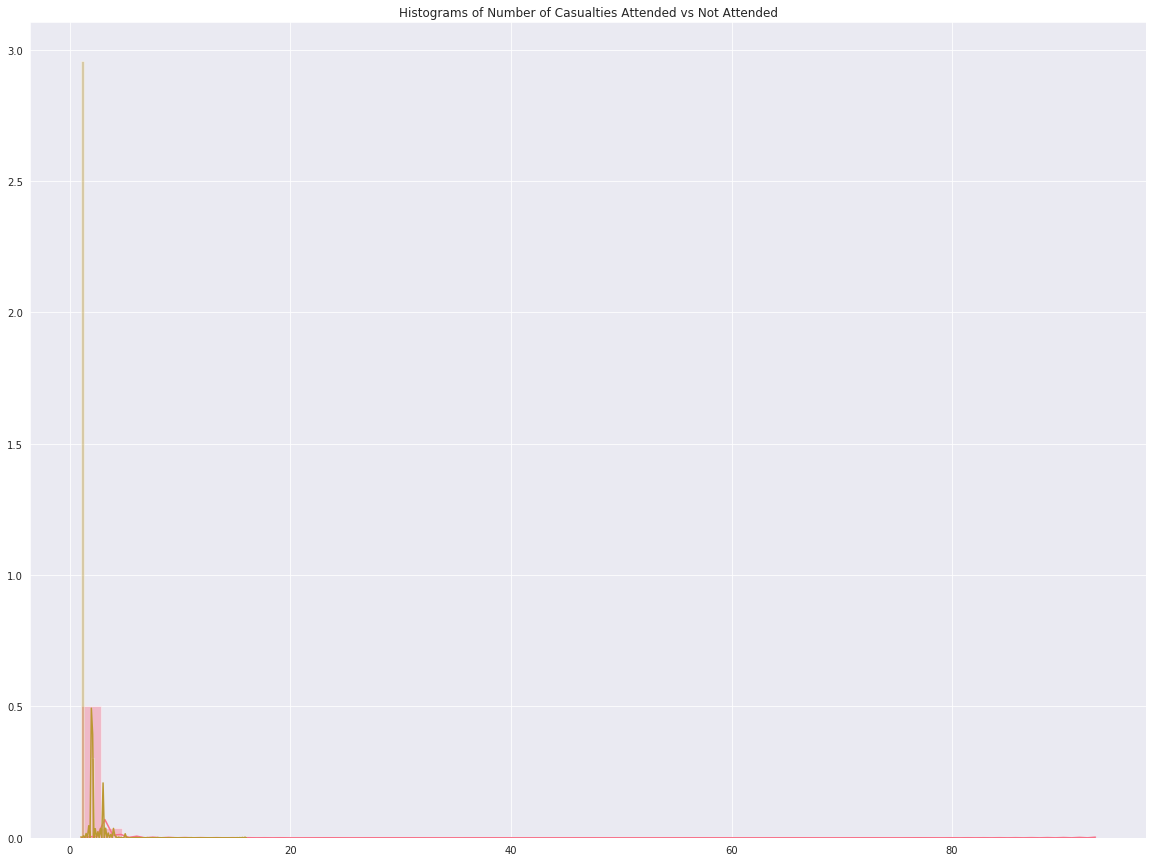

In [99]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Casualties']],bins=50,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Casualties']],bins=50,label='Not Attended')
plt.title('Histograms of Number of Casualties Attended vs Not Attended')

Text(0.5, 1.0, 'Zoomed Histograms of Number of Casualties Attended vs Not Attended')

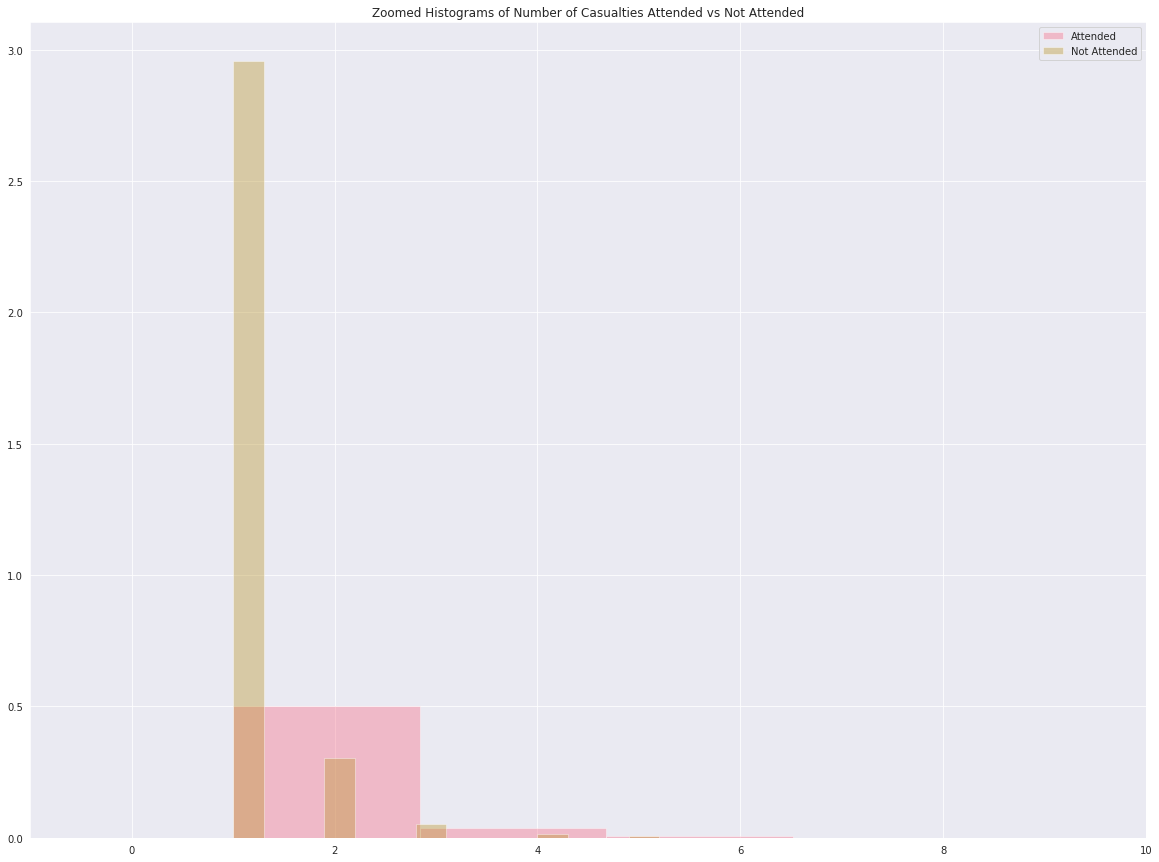

In [138]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Casualties']],norm_hist=True,bins=50,kde=False,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Casualties']],norm_hist=True,bins=50,kde=False,label='Not Attended')
plt.xlim(-1, 10)
plt.legend()
plt.title('Zoomed Histograms of Number of Casualties Attended vs Not Attended')

#### Number of Vehicles

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histograms of Number of Vehicles Attended vs Not Attended')

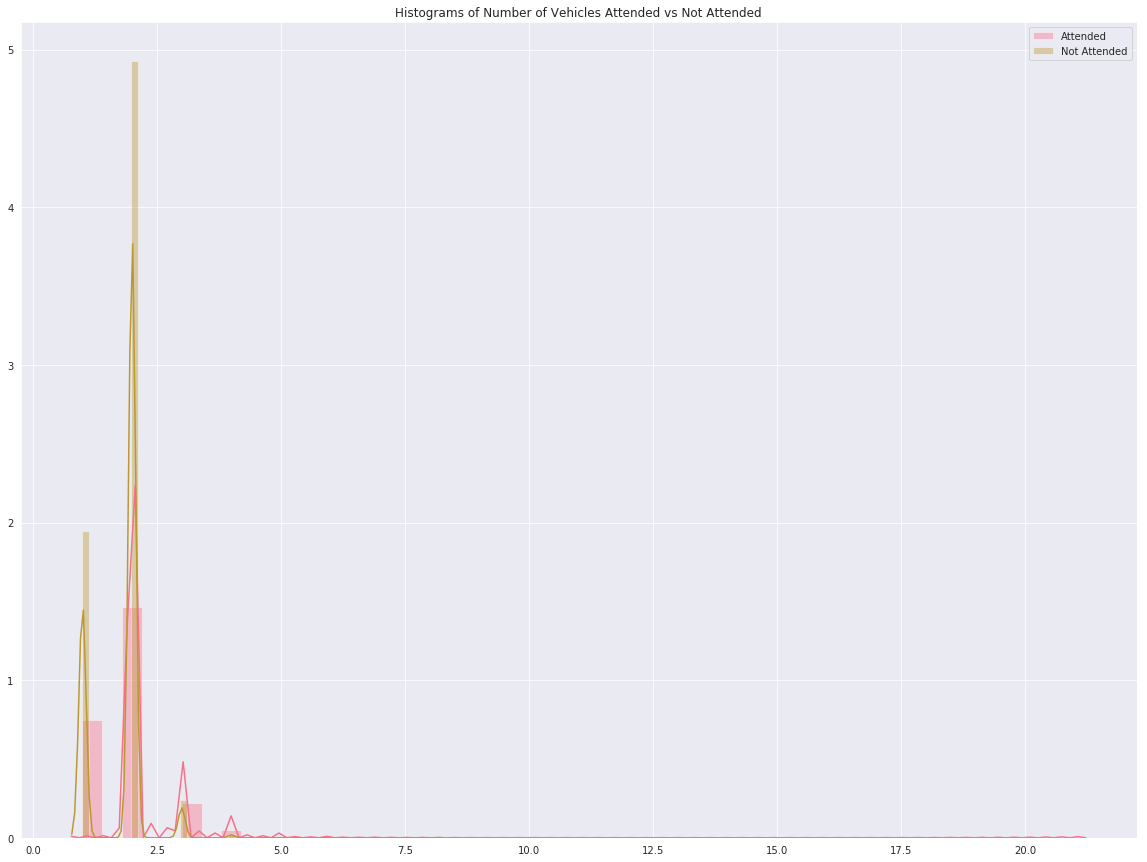

In [110]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Vehicles']],bins=50,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Vehicles']],bins=50,label='Not Attended')
plt.legend()
plt.title('Histograms of Number of Vehicles Attended vs Not Attended')

Text(0.5, 1.0, 'Zoomed Histograms of Number of Vehicles Attended vs Not Attended')

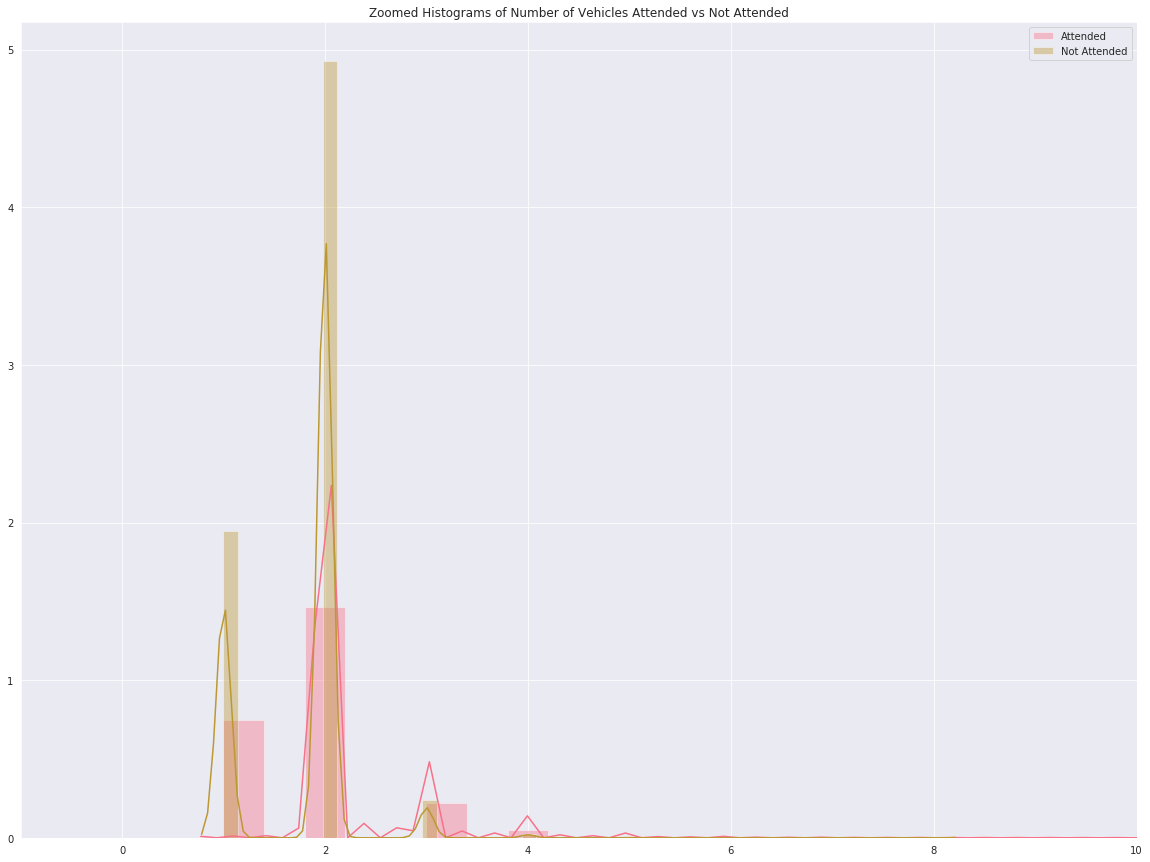

In [111]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Number_of_Vehicles']],bins=50,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Number_of_Vehicles']],bins=50,label='Not Attended')
plt.xlim(-1, 10)
plt.legend()
plt.title('Zoomed Histograms of Number of Vehicles Attended vs Not Attended')

#### 1st_Road_Class

1st_Road_Class Did_Police_Officer_Attend_Scene_of_Accident  Accident_Index
0               A                                          NO           11024
1               A                                         YES           56804
2            A(M)                                          NO              30
3            A(M)                                         YES             354
4               B                                          NO            3254
5               B                                         YES           15319
6               C                                          NO            2380
7               C                                         YES           10589
8        Motorway                                          NO             389
9        Motorway                                         YES            4857
10   Unclassified                                          NO            9638
11   Unclassified                                         YES           31684

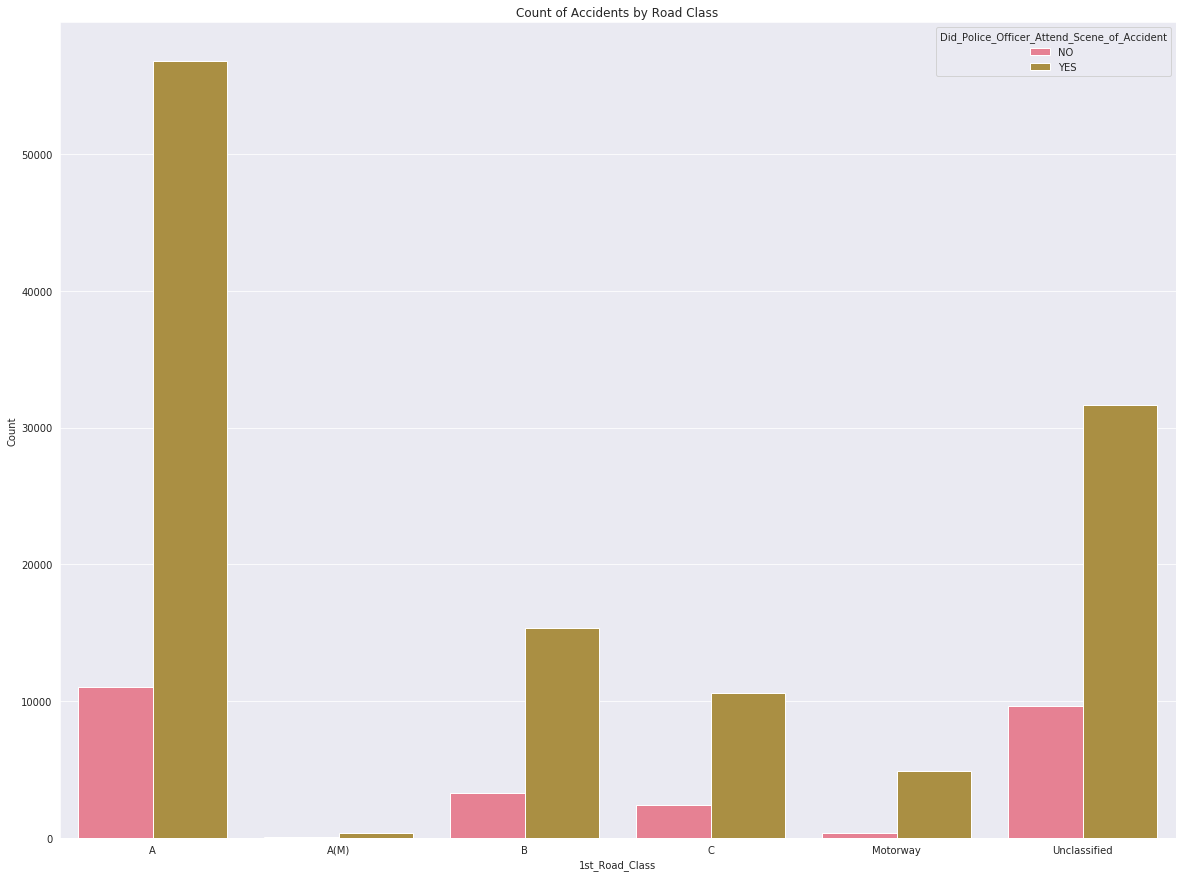

In [104]:
road_by_attend=df_acc.replace({'1st_Road_Class':
                               {1:'Motorway',2:'A(M)',3:'A',4:'B',5:'C',6:'Unclassified'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['1st_Road_Class','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['1st_Road_Class','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='1st_Road_Class', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=road_by_attend)
plt.ylabel("Count")
plt.title('Count of Accidents by Road Class')

road_by_attend

In [92]:
a=np.round((np.array(road_by_attend.loc[
    road_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(road_by_attend.loc[
    road_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(road_by_attend.loc[
     road_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=road_by_attend['1st_Road_Class'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Road Class")

Text(0.5, 1.0, 'Percentage of Police Not Attending by Road Class')

#### Road_Type

Road_Type Did_Police_Officer_Attend_Scene_of_Accident  \
0     Dual carriageway                                          NO   
1     Dual carriageway                                         YES   
2       One way street                                          NO   
3       One way street                                         YES   
4           Roundabout                                          NO   
5           Roundabout                                         YES   
6   Single carriageway                                          NO   
7   Single carriageway                                         YES   
8            Slip road                                          NO   
9            Slip road                                         YES   
10             Unknown                                          NO   
11             Unknown                                         YES   

    Accident_Index  
0             2664  
1            18159  
2              790  
3             2145  
4             2628  
5             7701  
6            20187  
7            90000  
8              256  
9             1286  
10             190  
11             316

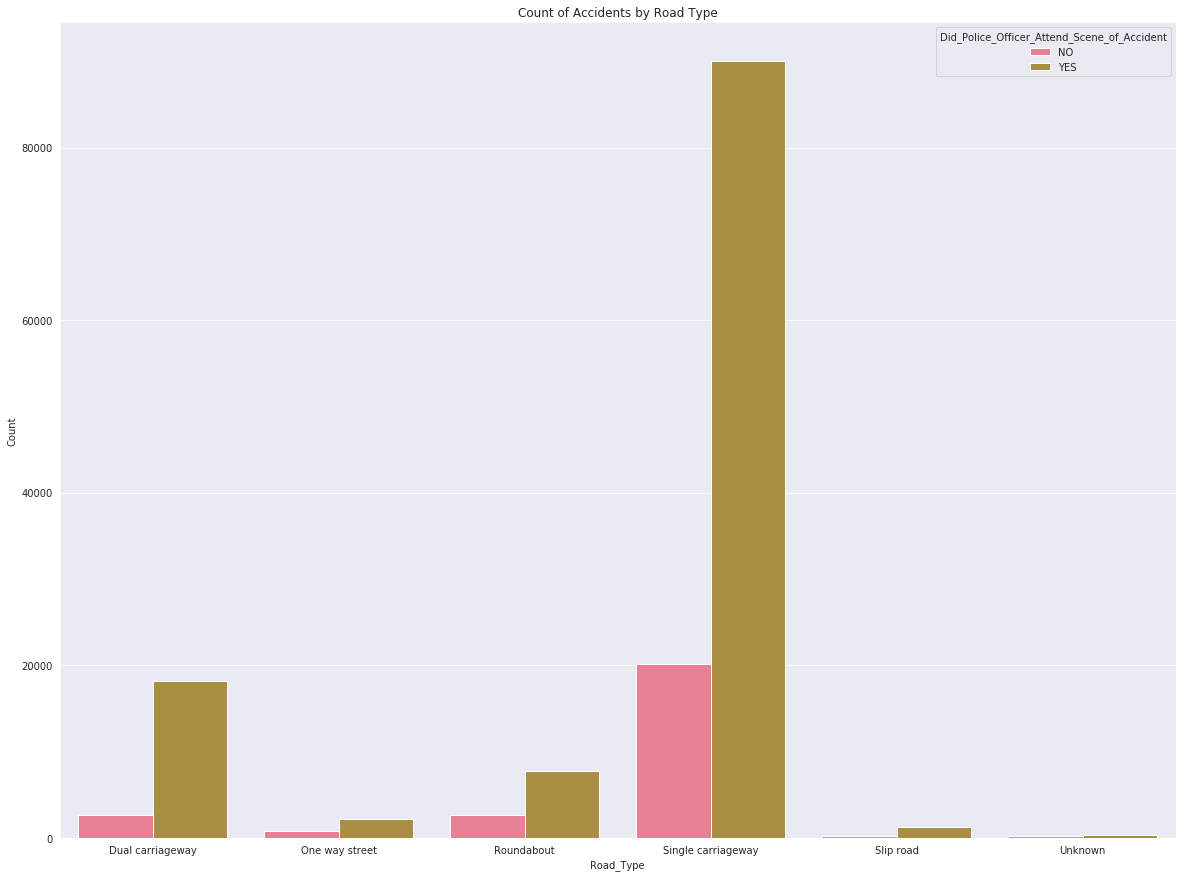

In [114]:
roadtype_by_attend=df_acc.replace({'Road_Type':
                               {1:'Roundabout',2:'One way street',3:'Dual carriageway',
                                6:'Single carriageway',7:'Slip road',9:'Unknown',
                                12:'One way street/Slip road'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Road_Type','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Road_Type','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Road_Type', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_attend)
plt.ylabel("Count")
plt.title('Count of Accidents by Road Type')
roadtype_by_attend

Text(0.5, 1.0, 'Percentage of Police Not Attending by Road Type')

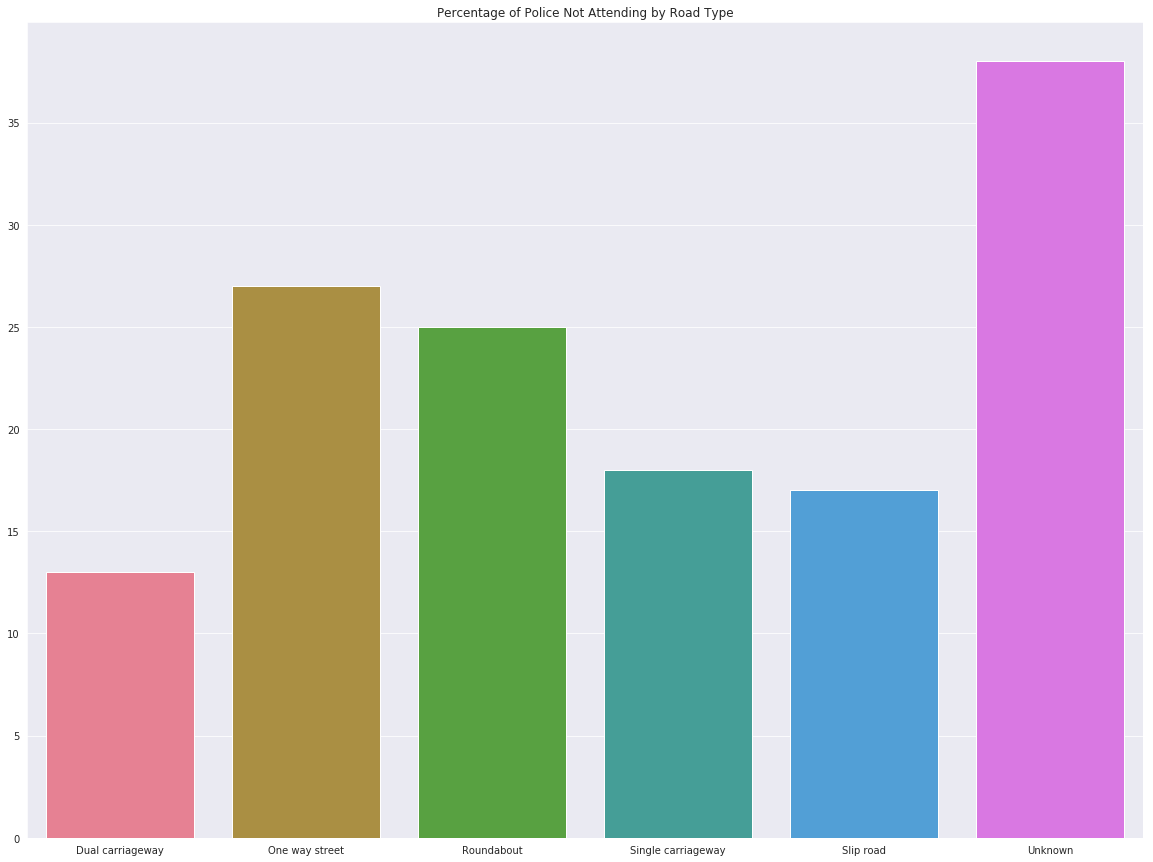

In [93]:
a=np.round((np.array(roadtype_by_attend.loc[
    roadtype_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_attend.loc[
    roadtype_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_attend.loc[
     roadtype_by_attend.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_attend['Road_Type'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Road Type")

#### Speed Limit

In [116]:
plt.figure(2, figsize=(20,15))
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 1,
                        ['Speed_limit']],bins=50,kde=False,label="Attended")
sns.distplot(df_acc.loc[df_acc.Did_Police_Officer_Attend_Scene_of_Accident == 0,
                        ['Speed_limit']],bins=50,kde=False,label='Not Attended')
# plt.xlim(-1, 10)

plt.legend()
plt.title('Histograms of Number of Accidents for Each Speed Limit Attended vs Not Attended')

Text(0.5, 1.0, 'Histograms of Number of Accidents for Each Speed Limit Attended vs Not Attended')

In [20]:
df_acc.Speed_limit.unique()

array([30, 40, 20, 50, 70, 60])

In [117]:
roadtype_by_limit=df_acc.replace({'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Speed_limit','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Speed_limit','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Speed_limit', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_limit)
plt.ylabel("Count")
plt.title('Count of Accidents by Speed Limit')
roadtype_by_limit

Speed_limit Did_Police_Officer_Attend_Scene_of_Accident  Accident_Index
0            20                                          NO             980
1            20                                         YES            2438
2            30                                          NO           21110
3            30                                         YES           73887
4            40                                          NO            1727
5            40                                         YES           10290
6            50                                          NO             511
7            50                                         YES            5286
8            60                                          NO            1662
9            60                                         YES           18354
10           70                                          NO             725
11           70                                         YES            9352

In [118]:
a=np.round((np.array(roadtype_by_limit.loc[
    roadtype_by_limit.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_limit.loc[
    roadtype_by_limit.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_limit.loc[
     roadtype_by_limit.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_limit['Speed_limit'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Speed Limit")

Text(0.5, 1.0, 'Percentage of Police Not Attending by Speed Limit')

#### Junction Detail

In [124]:
roadtype_by_jd=df_acc.replace({'Junction_Detail':
                               {0:'Not at junction or within 20 metres',
                                1:'Roundabout',
                                2:'Mini-roundabout',
                                3:'T or staggered junction',
                                5:'Slip road',
                                6:'Crossroads',
                                7:'More than 4 arms (not roundabout)',
                                8:'Private drive or entrance',
                                9:'Other junction'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Junction_Detail','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Junction_Detail','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Junction_Detail', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_jd)
plt.ylabel("Count")
plt.title('Count of Accidents by Junction Detail')
roadtype_by_jd

Junction_Detail  \
0                            Crossroads   
1                            Crossroads   
2                       Mini-roundabout   
3                       Mini-roundabout   
4     More than 4 arms (not roundabout)   
5     More than 4 arms (not roundabout)   
6   Not at junction or within 20 metres   
7   Not at junction or within 20 metres   
8                        Other junction   
9                        Other junction   
10            Private drive or entrance   
11            Private drive or entrance   
12                           Roundabout   
13                           Roundabout   
14                            Slip road   
15                            Slip road   
16              T or staggered junction   
17              T or staggered junction   

   Did_Police_Officer_Attend_Scene_of_Accident  Accident_Index  
0                                           NO            2320  
1                                          YES           12266  
2                                           NO             459  
3                                          YES            1497  
4                                           NO             187  
5                                          YES             830  
6                                           NO            9199  
7                                          YES           47211  
8                                           NO             547  
9                                          YES            2578  
10                                          NO            1175  
11                                         YES            4708  
12                                          NO            3504  
13                                         YES            9749  
14                                          NO             237  
15                                         YES            1841  
16                                          NO            9087  
17                                         YES           38927

In [125]:
a=np.round((np.array(roadtype_by_jd.loc[
    roadtype_by_jd.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_jd.loc[
    roadtype_by_jd.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_jd.loc[
     roadtype_by_jd.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_jd['Junction_Detail'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Junction Detail")

Text(0.5, 1.0, 'Percentage of Police Not Attending by Junction Detail')

#### Junction Control

Junction_Control Did_Police_Officer_Attend_Scene_of_Accident  \
0         Authorised person                                          NO   
1         Authorised person                                         YES   
2       Auto traffic signal                                          NO   
3       Auto traffic signal                                         YES   
4  Give way or uncontrolled                                          NO   
5  Give way or uncontrolled                                         YES   
6                 Stop sign                                          NO   
7                 Stop sign                                         YES   

   Accident_Index  
0              41  
1             159  
2            3130  
3           12143  
4           14210  
5           59529  
6             130  
7             513

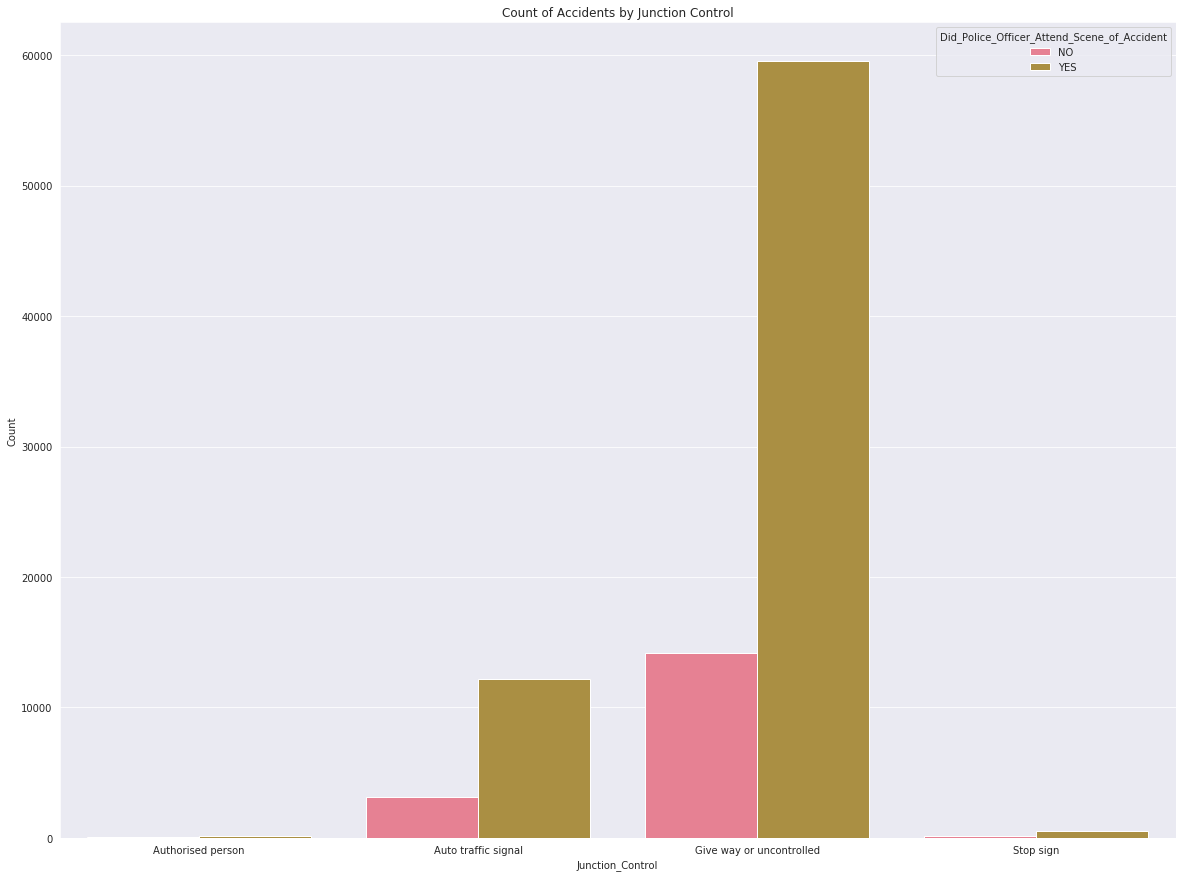

In [129]:
roadtype_by_jc=df_acc.replace({'Junction_Control':
                               {0:'Not at junction or within 20 metres',
                                1:'Authorised person',
                                2:'Auto traffic signal',
                                3:'Stop sign',
                                4:'Give way or uncontrolled',
                                -1:'Data missing or out of range'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Junction_Control','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Junction_Control','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Junction_Control', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_jc)
plt.ylabel("Count")
plt.title('Count of Accidents by Junction Control')
roadtype_by_jc

Text(0.5, 1.0, 'Percentage of Police Not Attending by Junction Control')

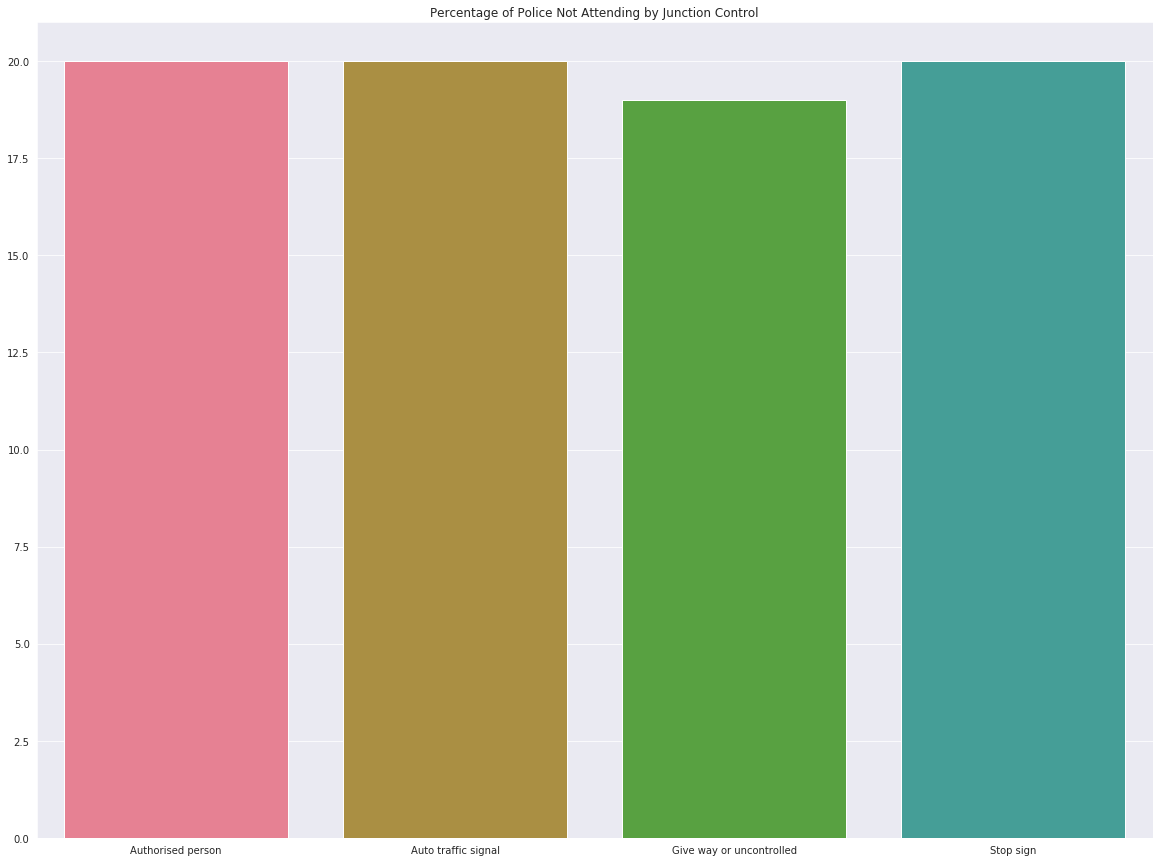

In [130]:
a=np.round((np.array(roadtype_by_jc.loc[
    roadtype_by_jc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_jc.loc[
    roadtype_by_jc.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_jc.loc[
     roadtype_by_jc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_jc['Junction_Control'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Junction Control")

#### Light Conditions

Light_Conditions Did_Police_Officer_Attend_Scene_of_Accident  \
0  Darkness - lighting unknown                                          NO   
1  Darkness - lighting unknown                                         YES   
2        Darkness - lights lit                                          NO   
3        Darkness - lights lit                                         YES   
4      Darkness - lights unlit                                          NO   
5      Darkness - lights unlit                                         YES   
6       Darkness - no lighting                                          NO   
7       Darkness - no lighting                                         YES   
8                     Daylight                                          NO   
9                     Daylight                                         YES   

   Accident_Index  
0             659  
1            1072  
2            4668  
3           23781  
4             121  
5             751  
6             419  
7            6780  
8           20848  
9           87223

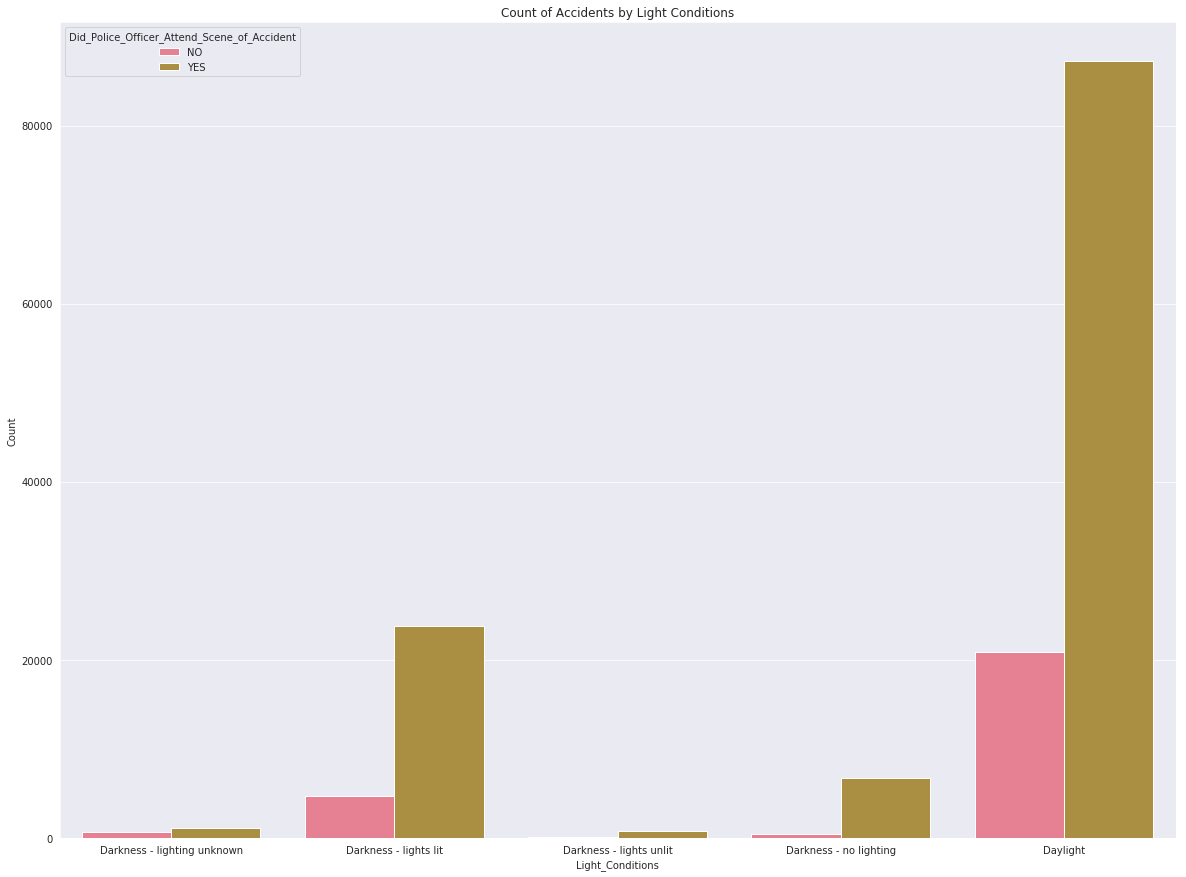

In [132]:
roadtype_by_lc=df_acc.replace({'Light_Conditions':
                               {1:'Daylight',
                                4:'Darkness - lights lit',
                                5:'Darkness - lights unlit',
                                6:'Darkness - no lighting',
                                7:'Darkness - lighting unknown'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Light_Conditions','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Light_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Light_Conditions', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_lc)
plt.ylabel("Count")
plt.title('Count of Accidents by Light Conditions')
roadtype_by_lc

In [133]:
a=np.round((np.array(roadtype_by_lc.loc[
    roadtype_by_lc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_lc.loc[
    roadtype_by_lc.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_lc.loc[
     roadtype_by_lc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_lc['Light_Conditions'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Light Conditions")

Text(0.5, 1.0, 'Percentage of Police Not Attending by Light Conditions')

#### Weather Conditions

Weather_Conditions Did_Police_Officer_Attend_Scene_of_Accident  Accident_Index
0       Fine + high winds                                          NO             215
1       Fine + high winds                                         YES            1360
2      Fine no high winds                                          NO           21690
3      Fine no high winds                                         YES           97189
4             Fog or mist                                          NO              86
5             Fog or mist                                         YES             667
6                   Other                                          NO             427
7                   Other                                         YES            1905
8    Raining + high winds                                          NO             295
9    Raining + high winds                                         YES            2038
10  Raining no high winds                                          NO            2520
11  Raining no high winds                                         YES           15145
12   Snowing + high winds                                          NO              11
13   Snowing + high winds                                         YES              67
14  Snowing no high winds                                          NO              35
15  Snowing no high winds                                         YES             192
16                Unknown                                          NO            1436
17                Unknown                                         YES            1044

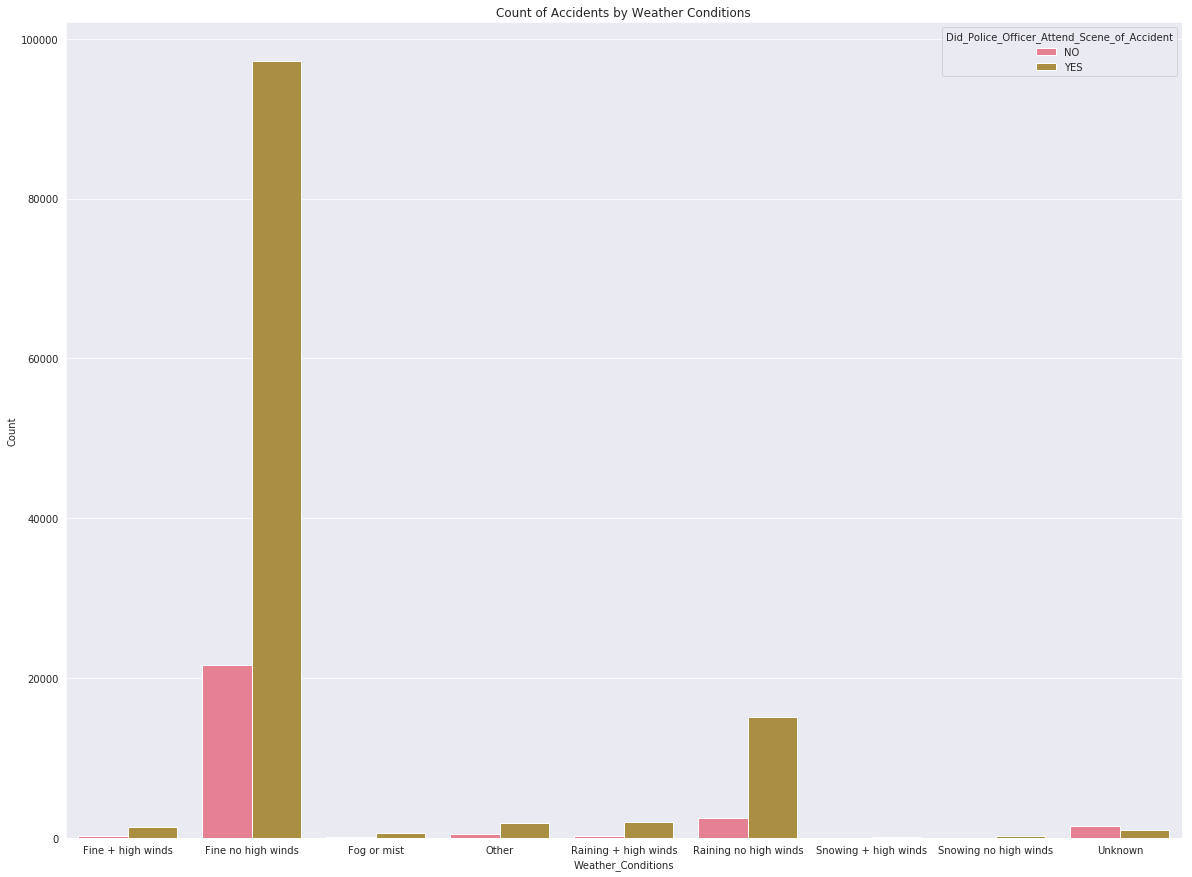

In [141]:
roadtype_by_wc=df_acc.replace({'Weather_Conditions':
                               {1:'Fine no high winds',
                                2:'Raining no high winds',
                                3:'Snowing no high winds',
                                4:'Fine + high winds',
                                5:'Raining + high winds',
                                6:'Snowing + high winds',
                                7:'Fog or mist',
                                8:'Other',
                                9:'Unknown'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Weather_Conditions','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Weather_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Weather_Conditions', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_wc)
plt.ylabel("Count")
plt.title('Count of Accidents by Weather Conditions')
roadtype_by_wc

Text(0.5, 1.0, 'Percentage of Police Not Attending by Weather Conditions')

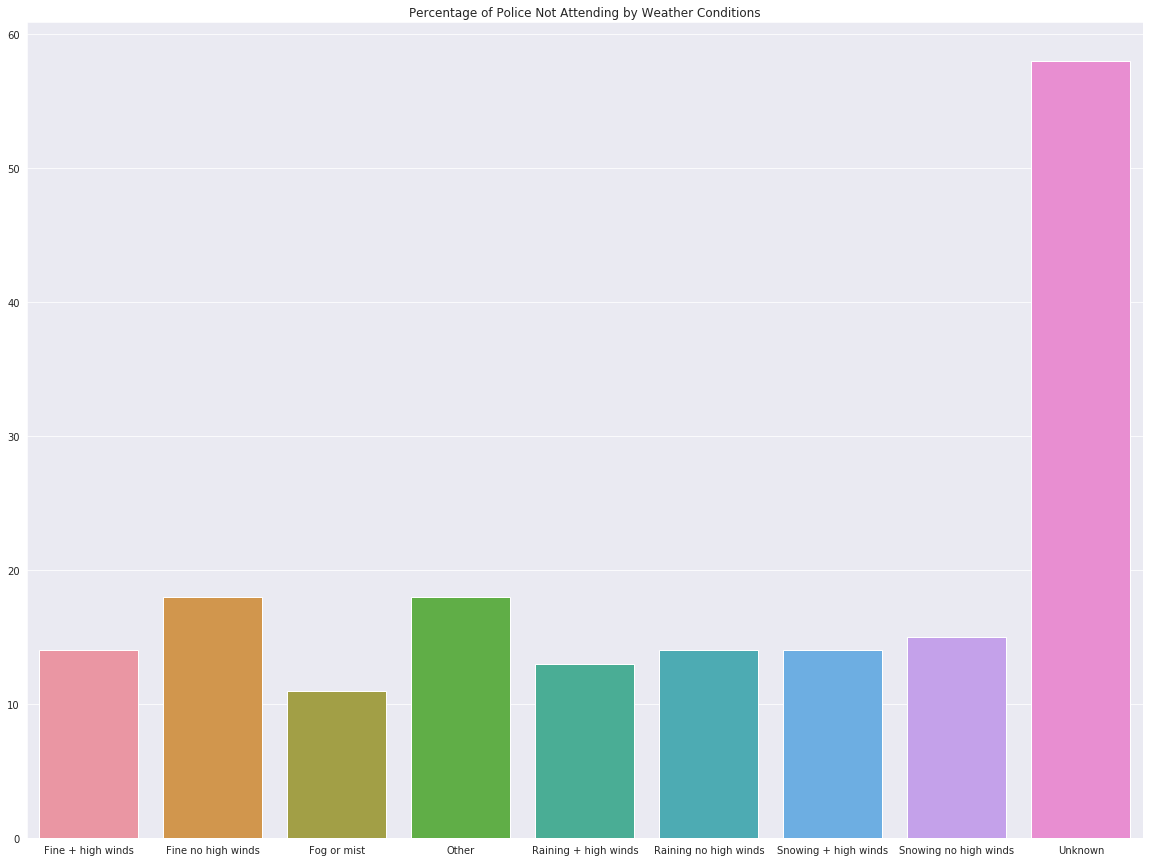

In [142]:
a=np.round((np.array(roadtype_by_wc.loc[
    roadtype_by_wc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_wc.loc[
    roadtype_by_wc.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_wc.loc[
     roadtype_by_wc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_wc['Weather_Conditions'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Weather Conditions")

#### Road Surface Conditions

Road_Surface_Conditions Did_Police_Officer_Attend_Scene_of_Accident  Accident_Index
0                     Dry                                          NO           20578
1                     Dry                                         YES           81441
2    Flood over 3cm. deep                                          NO              17
3    Flood over 3cm. deep                                         YES             245
4            Frost or ice                                          NO             148
5            Frost or ice                                         YES            1544
6                    Snow                                          NO              36
7                    Snow                                         YES             170
8             Wet or damp                                          NO            5758
9             Wet or damp                                         YES           36163

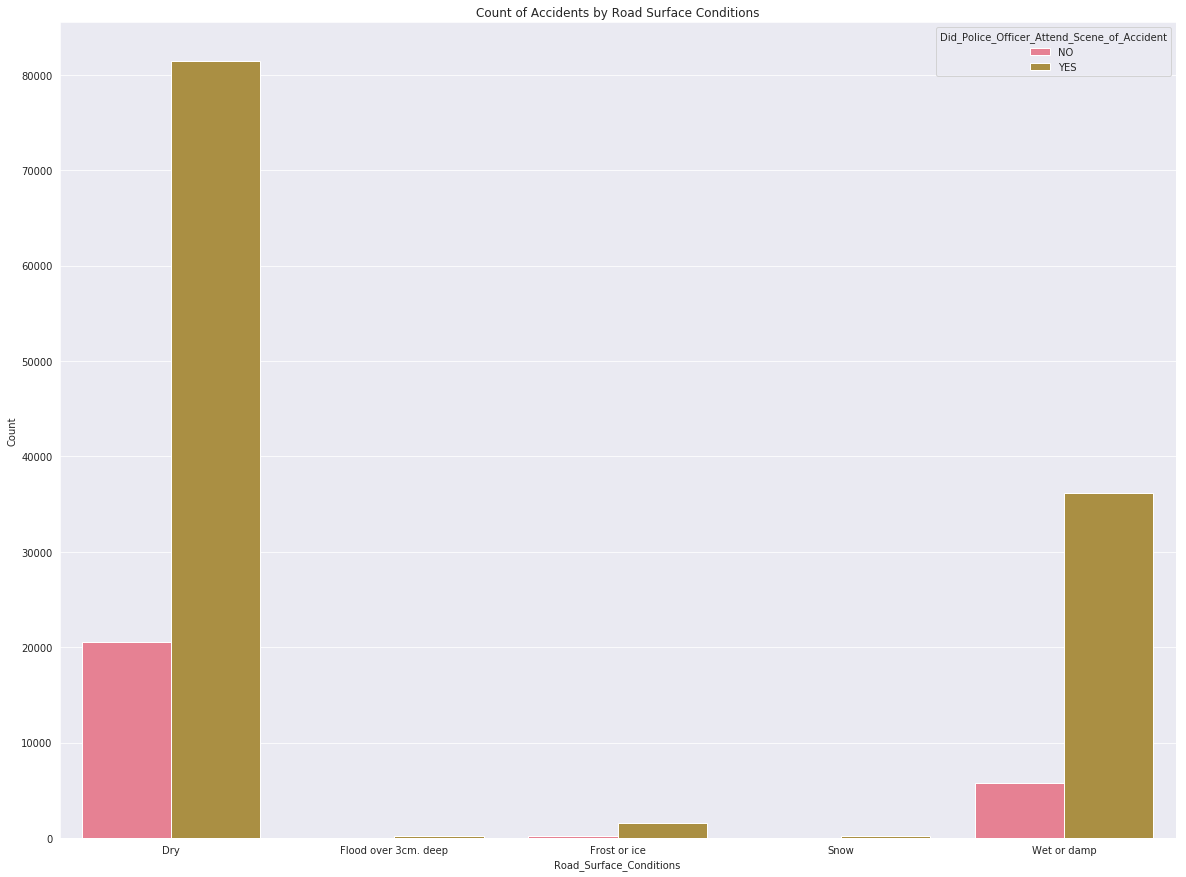

In [144]:
roadtype_by_rsc=df_acc.replace({'Road_Surface_Conditions':
                               {1:'Dry',
                                2:'Wet or damp',
                                3:'Snow',
                                4:'Frost or ice',
                                5:'Flood over 3cm. deep',
                                6:'Oil or diesel',
                                7:'Mud'},
              'Did_Police_Officer_Attend_Scene_of_Accident':{0:'NO',1:'YES'}})[
    ['Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident','Accident_Index']].groupby(
      ['Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident']).count().reset_index()

plt.figure(2, figsize=(20,15))
sns.barplot(x='Road_Surface_Conditions', y='Accident_Index', 
            hue ='Did_Police_Officer_Attend_Scene_of_Accident',
            data=roadtype_by_rsc)
plt.ylabel("Count")
plt.title('Count of Accidents by Road Surface Conditions')
roadtype_by_rsc

In [145]:
a=np.round((np.array(roadtype_by_rsc.loc[
    roadtype_by_rsc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']])/
  (np.array(roadtype_by_rsc.loc[
    roadtype_by_rsc.Did_Police_Officer_Attend_Scene_of_Accident=='YES',['Accident_Index']])
 +np.array(roadtype_by_rsc.loc[
     roadtype_by_rsc.Did_Police_Officer_Attend_Scene_of_Accident=='NO',['Accident_Index']]))),2)*100

plt.figure(2, figsize=(20,15))
sns.barplot(x=roadtype_by_rsc['Road_Surface_Conditions'].unique(),y=a[:,0])
plt.title("Percentage of Police Not Attending by Road Surface Conditions")

Text(0.5, 1.0, 'Percentage of Police Not Attending by Road Surface Conditions')

## Machine Learning 

In [173]:
df_acc.columns
# df_acc.isna().sum()

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location', 'dt', 'Month', 'Hour'], dtype='object')

In [178]:
columns = [
 'Date', 
 'dt',
 'Location_Easting_OSGR', 
 'Location_Northing_OSGR', 
 'Longitude',
 'Latitude', 
 'Number_of_Vehicles', 
 'Number_of_Casualties',
 'Speed_limit', 
 'Day_of_Week',
 'Time',
 'Month', 
 'Hour',
 'Police_Force', 
 'Accident_Severity', 
 'Local_Authority_(District)', 
 'Local_Authority_(Highway)', 
 '1st_Road_Class', 
 '1st_Road_Number', 
 'Road_Type', 
 'Junction_Detail', 
 'Junction_Control', 
 '2nd_Road_Class',
 '2nd_Road_Number', 
 'Pedestrian_Crossing-Human_Control', 
 'Pedestrian_Crossing-Physical_Facilities', 
 'Light_Conditions', 
 'Weather_Conditions', 
 'Road_Surface_Conditions', 
 'Special_Conditions_at_Site', 
 'Carriageway_Hazards', 
 'Urban_or_Rural_Area', 
 'LSOA_of_Accident_Location', 
 'Did_Police_Officer_Attend_Scene_of_Accident'
]
len(columns)

34

In [182]:
#column types
column_types = [None]*2 + \
               ['real']*6 +  \
               ['enum' for _ in range(len(columns) - 8)] 
len(column_types)

34

In [179]:
df=df_acc.sample(frac=1).reset_index(drop=True)[columns].copy()
train_df = df[:int(len(df)*0.8)]
test_df  = df[int(len(df)*0.8):]


#check the imbalance in test set
print (test_df.Did_Police_Officer_Attend_Scene_of_Accident.eq(1).sum(),
       test_df.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum())
print ('Police attended in the {}% of cases'.
        format(round((test_df.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum()/
                      len(test_df))
                                                     *100)))

23914 5351
Police attended in the 18.0% of cases


In [169]:
#check the imbalance in train set
print (train_df.Did_Police_Officer_Attend_Scene_of_Accident.eq(1).sum(),
       train_df.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum())
print ('Police attended in the {}% of cases'.
        format(round((train_df.Did_Police_Officer_Attend_Scene_of_Accident.eq(0).sum()/
                      len(train_df))
                                                     *100)))

95695 21362
Police attended in the 18.0% of cases


In [183]:
## Import data into h2o
h2o.init(ip='localhost', nthreads=70, port=54321)
# h2o.connect(ip='192.168.0.31',  port=54321)



## import data to h2o
train = h2o.H2OFrame(train_df, column_types=column_types)
# val = h2o.H2OFrame(val_pd,  column_types=column_types)
test = h2o.H2OFrame(test_df, column_types=column_types)


## set predictors and response
predictors = train.columns[:-1]

remove = [
          # 'problemsfoundyn'
          # ,'masterphasingvalue'
          # ,'mastertripvalue'
          # ,'masterrelay'
          # ,'bnrelayovercurrentsetting'
          # ,'masterclosevalue'
          ]
for it in remove:
    predictors.remove(it)

response = 'Did_Police_Officer_Attend_Scene_of_Accident'


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppsu43o_z
  JVM stdout: /tmp/tmppsu43o_z/h2o_norayrm_started_from_python.out
  JVM stderr: /tmp/tmppsu43o_z/h2o_norayrm_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       America/Chicago
H2O data parsing timezone:  UTC
H2O cluster version:        3.20.0.8
H2O cluster version age:    1 year, 3 months and 17 days !!!
H2O cluster name:           H2O_from_python_norayrm_crvol4
H2O cluster total nodes:    1
H2O cluster free memory:    26.67 Gb
H2O cluster total cores:    72
H2O cluster allowed cores:  70
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.6 final
--------------------------  ----------------------------------------

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [189]:

def conv_tf(l):
    l_b=[]
    for i in l:
        if i[0] == True:
            l_b.append('YES')
        else:
            l_b.append('NO')
    return np.array(l_b)



def conv_b(l):
    l_b=[]
    for i in l:
        if i=='YES':
            l_b.append(1)
        else:
            l_b.append(0)
    return np.array(l_b)

def conv_s(l):
    l_s=[]
    for i in l:
        if i==1:
            l_s.append('YES')
        else:
            l_s.append('NO')
    return np.array(l_s)


def conf_m(t,real_l,pred_l):
    pred_thr=[]
    for i in pred_l:
        if i>=t:
            # print i
            pred_thr.append(1)
        else:
            pred_thr.append(0)
    return confusion_matrix(real_l, pred_thr)


def readable_time(seconds):
    """Returns h:mm:ss formatted time from time in seconds.

    Args:
        seconds (float): Number of seconds to convert to readable time.

    """
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)

    return "%d:%02d:%02d" % (h, m, s)


def confusion_matrix_max(frame, pred_col, real_col, threshold):
    """Creates a confusion matrix based on the truth value of the predictions and a threshold.

    Args:
        frame (H2OFrame, DataFrame): Frame with headers.
        pred_col (str): Name of column with predictions.
        real_col (str): Name of column with actuals.
        threshold (float): Threshold determining vote of prediction column.

    Returns:
        ConfusionMatrix
    """
    predicted = frame[pred_col].apply(lambda row: 1 if row >= threshold else 0)
    real = frame[real_col]
    matrix = ConfusionMatrix(list(real), list(predicted))

    return matrix, matrix.precision, threshold


def draw_roc(frame,model,if_print=True):
    """Plots and ROC curve of a given model and a test frame.

    Args:
        frame (H2OFrame, DataFrame): The test frame.
        model: and H2O trained model.
        if_print (Boolean): A Boolean if needed to print confusion matrices at different thresholds.

    Returns:
        Predictionson the test frame
    """
    # ##############################################################
    # # Run model prediction and assess
    prediction_dnn = model.predict(frame)
    # real = conv_tf(frame['Did_Police_Officer_Attend_Scene_of_Accident'].as_data_frame().values)
    real = frame['Did_Police_Officer_Attend_Scene_of_Accident'].as_data_frame().values

    pred_model = prediction_dnn.as_data_frame()['predict']

    # p_yes_dnn=model.predict(frame).as_data_frame()['True']
    p_yes_dnn=prediction_dnn.as_data_frame()['p1']

    fpr, tpr, thr = roc_curve(real, p_yes_dnn)
    roc_auc = auc(fpr, tpr)

    if if_print == True:
        dtp_dnn=pd.DataFrame()
        for t in thr:
            c_dnn_t=conf_m(t,real,p_yes_dnn)
            tn, fp, fn, tp=c_dnn_t.ravel()
            if (tp+fp)>0:
                print(c_dnn_t, '\n Precsision = ', round(float(tp)/(tp+fp),3) , '\n Threshold = ', round(t,3))
                # dtp_dnn = dtp_dnn.append(
                #     {'Threshold': t, 'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp, 'Precision': round(float(tp) / (tp + fp), 3)},
                #     ignore_index=True)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {};'.format(model.model_id))
    plt.legend(loc="lower right")
    plt.ion()

    # plt.interactive(False)
    plt.show()
    return p_yes_dnn


def draw_prec_recall(frame,model,if_print=True):
    """Plots and Precision Recall curve of a given model and a test frame.

    Args:
        frame (H2OFrame, DataFrame): The test frame.
        model: and H2O trained model.
        if_print (Boolean): A Boolean if needed to print confusion matrices at different thresholds.

    Returns:
        Predictionson the test frame
    """
    # ##############################################################
    # # Run model prediction and assess
    prediction_dnn = model.predict(frame)
    # real = conv_tf(frame['Did_Police_Officer_Attend_Scene_of_Accident'].as_data_frame().values)
    real = frame['Did_Police_Officer_Attend_Scene_of_Accident'].as_data_frame().values

    pred_model = prediction_dnn.as_data_frame()['predict']

    # p_yes_dnn=model.predict(frame).as_data_frame()['True']
    p_yes_dnn=prediction_dnn.as_data_frame()['p1']

    precision, recall, thr = precision_recall_curve(real, p_yes_dnn)
    # roc_auc = auc(fpr, tpr)

    if if_print == True:
        dtp_dnn=pd.DataFrame()
        for t in thr:
            c_dnn_t=conf_m(t,real,p_yes_dnn)
            tn, fp, fn, tp=c_dnn_t.ravel()
            if (tp+fp)>0:
                print(c_dnn_t, '\n Precsision = ', round(float(tp)/(tp+fp),3) , '\n Threshold = ', round(t,3))
                # dtp_dnn = dtp_dnn.append(
                #     {'Threshold': t, 'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp, 'Precision': round(float(tp) / (tp + fp), 3)},
                #     ignore_index=True)

    plt.figure()
    lw = 2
    plt.step(recall, precision, color='b', alpha = 0.2, where= 'post')
    plt.fill_between(recall,precision, alpha=0.2, color='b')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Sensitivity, TPR)')
    plt.ylabel('Precision')
    plt.title('Precision - Recall curve {};'.format(model.model_id))
    plt.legend(loc="lower right")
    plt.ion()

    # plt.interactive(False)
    plt.show()
    return p_yes_dnn


def draw_prec_thr(frame,model,if_print=True):
    """Plots and Precision Recall curve of a given model and a test frame.

    Args:
        frame (H2OFrame, DataFrame): The test frame.
        model: and H2O trained model.
        if_print (Boolean): A Boolean if needed to print confusion matrices at different thresholds.

    Returns:
        Predictionson the test frame
    """
    # ##############################################################
    # # Run model prediction and assess
    prediction_dnn = model.predict(frame)
    # real = conv_tf(frame['Did_Police_Officer_Attend_Scene_of_Accident'].as_data_frame().values)
    real = frame['Did_Police_Officer_Attend_Scene_of_Accident'].as_data_frame().values

    pred_model = prediction_dnn.as_data_frame()['predict']

    # p_yes_dnn=model.predict(frame).as_data_frame()['True']
    p_yes_dnn=prediction_dnn.as_data_frame()['p1']

    precision, recall, thr = precision_recall_curve(real, p_yes_dnn)
    # roc_auc = auc(fpr, tpr)

    if if_print == True:
        dtp_dnn=pd.DataFrame()
        for t in thr:
            c_dnn_t=conf_m(t,real,p_yes_dnn)
            tn, fp, fn, tp=c_dnn_t.ravel()
            if (tp+fp)>0:
                print(c_dnn_t, '\n Precsision = ', round(float(tp)/(tp+fp),3) , '\n Threshold = ', round(t,3))
                # dtp_dnn = dtp_dnn.append(
                #     {'Threshold': t, 'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp, 'Precision': round(float(tp) / (tp + fp), 3)},
                #     ignore_index=True)

    plt.figure()
    lw = 2
    plt.step(thr, precision[:-1], color='r', alpha = 0.2, where= 'post')
    plt.fill_between(thr,precision[:-1], alpha=0.2, color='r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.title('Precision - Threshold curve {};'.format(model.model_id))
    plt.legend(loc="lower right")
    plt.ion()

    # plt.interactive(False)
    plt.show()
    return p_yes_dnn

def plot_confusion_matrix(t,real_l,pred_l, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    pred_thr=[]
    for i in pred_l:
        if i>=t:
            # print i
            pred_thr.append(1)
        else:
            pred_thr.append(0)

    cm = confusion_matrix(real_l, pred_thr)
    ##################################
    # cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(real_l, pred_l)]
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## End Functions
######################################################################
pd.set_option("display.max_columns", 15,"display.width",1000)
pd.set_option("display.max_rows", 20)


In [191]:
#######################################################################################
## GBM
# # Create and train GBM
model_gbm = H2OGradientBoostingEstimator(
    model_id="gbm_basic",
    ntrees= 74
    ,max_depth=7
    # ,nfolds=5
    # ,fold_assignment='Modulo'
    ,score_tree_interval=5
    ,min_rows = 100
    ,distribution='bernoulli'
    ,sample_rate=0.8
    ,col_sample_rate=0.8
    ,col_sample_rate_per_tree=0.8
    ,learn_rate=0.08
    # ,stopping_tolerance=0.01 #10-fold increase in threshold as defined in rf_v1
    # ,stopping_rounds=0
    , stopping_metric="logloss" #"misclassification" # "AUC"  #   "AUC" #
    ,score_each_iteration=False
    # ,keep_cross_validation_predictions=True
    ,seed=4413976168041433600
)
t_start=time.time()
model_gbm.train(x=predictors, y=response, training_frame=train )#, validation_frame=val)
tt=time.time()-t_start
print("Time to train (sec): ", tt)



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Time to train (sec):  6.092192888259888


In [192]:

print( model_gbm.model_performance(test))




ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13465301808727953
RMSE: 0.3669509750460946
LogLoss: 0.4245731637746575
Mean Per-Class Error: 0.33350247359773133
AUC: 0.7285744702795433
Gini: 0.4571489405590865
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.362996631251951: 


0    1      Error    Rate
-----  ---  -----  -------  ----------------
0      198  5153   0.963    (5153.0/5351.0)
1      69   23845  0.0029   (69.0/23914.0)
Total  267  28998  0.1784   (5222.0/29265.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.362997     0.901308  356
max f2                       0.0951724    0.957426  391
max f0point5                 0.693373     0.860871  238
max accuracy                 0.399496     0.821562  349
max precision                0.992532     1         0
max recall                   0.0951724    1         391
max specificity              0.992532     1         0
max absolute_mcc             0.779255     0.260579  184
max min_per_class_accuracy   0.821552     0.66268   151
max mean_per_class_accuracy  0.842603     0.666498  134

Gains/Lift Table: Avg response rate: 81.72 %, avg score: 82.50 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.010012                    0.987009           1.21123   1.21123            0.989761         0.989168  0.989761                    0.989168            0.0121268       0.0121268                  21.123    21.123
    2        0.0200239                   0.984966           1.21958   1.21541            0.996587         0.98596   0.993174                    0.987564            0.0122104       0.0243372                  21.9583   21.5407
    3        0.0300017                   0.98327            1.22376   1.21818            1                0.984125  0.995444                    0.98642             0.0122104       0.0365476                  22.376    21.8185
    4        0.0400137                   0.981527           1.20705   1.2154             0.986348         0.982389  0.993168                    0.985412            0.012085        0.0486326                  20.7054   21.54
    5        0.0500256                   0.979581           1.1987    1.21206            0.979522         0.980553  0.990437                    0.984439            0.0120013       0.0606339                  19.87     21.2058
    6        0.100017                    0.968357           1.18946   1.20076            0.971975         0.974098  0.981209                    0.97927             0.0594631       0.120097                   18.9465   20.0765
    7        0.150009                    0.956333           1.16604   1.18919            0.952837         0.962237  0.971754                    0.973594            0.0582922       0.178389                   16.6043   18.9194
    8        0.2                         0.944421           1.16186   1.18236            0.949419         0.95041   0.966171                    0.967799            0.0580831       0.236472                   16.1861   18.2362
    9        0.300017                    0.919047           1.11965   1.16146            0.91493          0.931941  0.949089                    0.955845            0.111985        0.348457                   11.9655   16.1457
    10       0.4                         0.890696           1.08281   1.1418             0.884826         0.905055  0.933026                    0.94315             0.108263        0.45672                    8.28144   14.18
    11       0.500017                    0.858825           1.02809   1.11906            0.840109         0.874831  0.91444                     0.929484            0.102827        0.559547                   2.80923   11.9055
    12       0.6                         0.823021           1.00628   1.10026            0.822283         0.84137   0.899083                    0.914801            0.100611        0.660157                   0.627714  10.0262
    13       0.699983                    0.779636           0.962362  1.08056            0.786398         0.802209  0.882988                    0.898718            0.0962198       0.756377                   -3.76377  8.0565
    14       0.8                         0.722185           0.898483  1.0578             0.734199         0.752511  0.864386                    0.880439            0.0898637       0.846241                   -10.1517  5.78009
    15       0.899983                    0.635941           0.809706  1.03024            0.661654         0.682954  0.841863                    0.8585              0.0809568       0.927197                   -19.0294  3.0239
    16       1                           0.0238278          0.727901  1                  0.594807         0.523113  0.817154                    0.824955            0.07

gbm prediction progress: |████████████████████████████████████████████████| 100%


/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Longitude' has levels not trained on: [-0.000245, -0.00045, -0.00057, -0.00078, -0.000802, -0.00086, -0.0008619999999999999, -0.0008730000000000001, -0.001006, -0.001017, -0.00115, -0.001209, -0.0013830000000000001, -0.0015220000000000001, -0.001545, -0.001565, -0.001784, -0.001812, -0.0018690000000000002, -0.001891, -0.001905, -0.001986, -0.002075, -0.0021149999999999997, -0.002275, -0.002353, -0.002356, -0.0025800000000000003, -0.002616, -0.002794, -0.003102, -0.003127, -0.003175, -0.003179, -0.003192, -0.003207, -0.0033299999999999996, -0.003703, -0.003805, -0.003834, -0.003849, -0.003921, -0.003924, -0.0043219999999999995, -0.00443, -0.004456, -0.004574, -0.0048119999999999994, -0.004952000000000001, -0.004964, -0.005029, -0.005131, -0.005144, -0.005370000000000001, -0.005388, -0.0054789999999999995, -0.005562, -0.005719, -0.005848, -0.0058590000000000005, -0.0059

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Latitude' has levels not trained on: [50.035861, 50.056470000000004, 50.064875, 50.087163000000004, 50.093795, 50.103922999999995, 50.106479, 50.106911, 50.108255, 50.112704, 50.11391, 50.116701, 50.11721, 50.117932, 50.118584999999996, 50.119684, 50.119721000000006, 50.120841999999996, 50.12173, 50.122240000000005, 50.123692, 50.129638, 50.130474, 50.134962, 50.135435, 50.141463, 50.142216999999995, 50.143749, 50.144807, 50.145545, 50.145928000000005, 50.152063, 50.152483000000004, 50.153172999999995, 50.153397, 50.155945, 50.157988, 50.160682, 50.162364000000004, 50.16283, 50.163969, 50.166246, 50.166247, 50.170804, 50.171485, 50.171701, 50.178825, 50.180198, 50.185624, 50.187512, 50.187893, 50.189032, 50.189093, 50.19073, 50.193005, 50.194196999999996, 50.194665, 50.200390999999996, 50.200604, 50.202993, 50.204181, 50.204989000000005, 50.205425, 50.206002000000005,

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Number_of_Vehicles' has levels not trained on: [21]
  warnings.warn(w)
/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Number_of_Casualties' has levels not trained on: [18, 41, 87]
  warnings.warn(w)
/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column '1st_Road_Number' has levels not trained on: [1148, 1162, 1259, 1292, 1388, 1491, 1545, 1582, 1627, 1715, 1734, 1751, 1765, 1769, 1782, 1864, 1878, 1921, 1939, 1943, 1952, 1981, 2077, 2157, 2167, 2169, 2261, 2285, 2351, 2357, 2371, 2453, 2460, 2497, 2601, 2621, 2623, 2655, 2672, 2679, 2741, 2742, 2802, 2869, 2910, 3048, 3077, 3182, 3186, 3242, 3262, 3277, 3279, 3305, 3346, 3364, 3367, 3425, 3473, 3480, 3497, 3516, 3675, 3708, 3759, 3782, 3825, 3829, 3898, 4198, 4219, 4236, 4262, 4269,

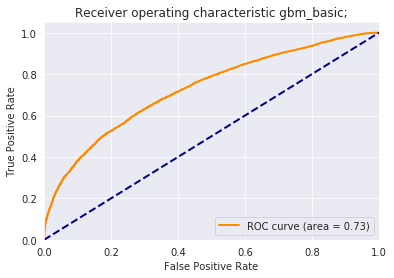

In [193]:
pred_gbm=draw_roc(test,model_gbm,False)

pr=draw_prec_recall(test,model_gbm,False)
pt=draw_prec_thr(test,model_gbm,False)


# Drav variable importances from h2o
model_gbm.varimp_plot(20)

gbm prediction progress: |████████████████████████████████████████████████| 100%


/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Longitude' has levels not trained on: [-0.000245, -0.00045, -0.00057, -0.00078, -0.000802, -0.00086, -0.0008619999999999999, -0.0008730000000000001, -0.001006, -0.001017, -0.00115, -0.001209, -0.0013830000000000001, -0.0015220000000000001, -0.001545, -0.001565, -0.001784, -0.001812, -0.0018690000000000002, -0.001891, -0.001905, -0.001986, -0.002075, -0.0021149999999999997, -0.002275, -0.002353, -0.002356, -0.0025800000000000003, -0.002616, -0.002794, -0.003102, -0.003127, -0.003175, -0.003179, -0.003192, -0.003207, -0.0033299999999999996, -0.003703, -0.003805, -0.003834, -0.003849, -0.003921, -0.003924, -0.0043219999999999995, -0.00443, -0.004456, -0.004574, -0.0048119999999999994, -0.004952000000000001, -0.004964, -0.005029, -0.005131, -0.005144, -0.005370000000000001, -0.005388, -0.0054789999999999995, -0.005562, -0.005719, -0.005848, -0.0058590000000000005, -0.0059

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Latitude' has levels not trained on: [50.035861, 50.056470000000004, 50.064875, 50.087163000000004, 50.093795, 50.103922999999995, 50.106479, 50.106911, 50.108255, 50.112704, 50.11391, 50.116701, 50.11721, 50.117932, 50.118584999999996, 50.119684, 50.119721000000006, 50.120841999999996, 50.12173, 50.122240000000005, 50.123692, 50.129638, 50.130474, 50.134962, 50.135435, 50.141463, 50.142216999999995, 50.143749, 50.144807, 50.145545, 50.145928000000005, 50.152063, 50.152483000000004, 50.153172999999995, 50.153397, 50.155945, 50.157988, 50.160682, 50.162364000000004, 50.16283, 50.163969, 50.166246, 50.166247, 50.170804, 50.171485, 50.171701, 50.178825, 50.180198, 50.185624, 50.187512, 50.187893, 50.189032, 50.189093, 50.19073, 50.193005, 50.194196999999996, 50.194665, 50.200390999999996, 50.200604, 50.202993, 50.204181, 50.204989000000005, 50.205425, 50.206002000000005,

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Number_of_Vehicles' has levels not trained on: [21]
  warnings.warn(w)
/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Number_of_Casualties' has levels not trained on: [18, 41, 87]
  warnings.warn(w)
/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column '1st_Road_Number' has levels not trained on: [1148, 1162, 1259, 1292, 1388, 1491, 1545, 1582, 1627, 1715, 1734, 1751, 1765, 1769, 1782, 1864, 1878, 1921, 1939, 1943, 1952, 1981, 2077, 2157, 2167, 2169, 2261, 2285, 2351, 2357, 2371, 2453, 2460, 2497, 2601, 2621, 2623, 2655, 2672, 2679, 2741, 2742, 2802, 2869, 2910, 3048, 3077, 3182, 3186, 3242, 3262, 3277, 3279, 3305, 3346, 3364, 3367, 3425, 3473, 3480, 3497, 3516, 3675, 3708, 3759, 3782, 3825, 3829, 3898, 4198, 4219, 4236, 4262, 4269,

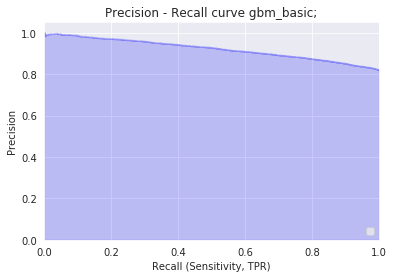

gbm prediction progress: |████████████████████████████████████████████████| 100%


/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Longitude' has levels not trained on: [-0.000245, -0.00045, -0.00057, -0.00078, -0.000802, -0.00086, -0.0008619999999999999, -0.0008730000000000001, -0.001006, -0.001017, -0.00115, -0.001209, -0.0013830000000000001, -0.0015220000000000001, -0.001545, -0.001565, -0.001784, -0.001812, -0.0018690000000000002, -0.001891, -0.001905, -0.001986, -0.002075, -0.0021149999999999997, -0.002275, -0.002353, -0.002356, -0.0025800000000000003, -0.002616, -0.002794, -0.003102, -0.003127, -0.003175, -0.003179, -0.003192, -0.003207, -0.0033299999999999996, -0.003703, -0.003805, -0.003834, -0.003849, -0.003921, -0.003924, -0.0043219999999999995, -0.00443, -0.004456, -0.004574, -0.0048119999999999994, -0.004952000000000001, -0.004964, -0.005029, -0.005131, -0.005144, -0.005370000000000001, -0.005388, -0.0054789999999999995, -0.005562, -0.005719, -0.005848, -0.0058590000000000005, -0.0059

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Latitude' has levels not trained on: [50.035861, 50.056470000000004, 50.064875, 50.087163000000004, 50.093795, 50.103922999999995, 50.106479, 50.106911, 50.108255, 50.112704, 50.11391, 50.116701, 50.11721, 50.117932, 50.118584999999996, 50.119684, 50.119721000000006, 50.120841999999996, 50.12173, 50.122240000000005, 50.123692, 50.129638, 50.130474, 50.134962, 50.135435, 50.141463, 50.142216999999995, 50.143749, 50.144807, 50.145545, 50.145928000000005, 50.152063, 50.152483000000004, 50.153172999999995, 50.153397, 50.155945, 50.157988, 50.160682, 50.162364000000004, 50.16283, 50.163969, 50.166246, 50.166247, 50.170804, 50.171485, 50.171701, 50.178825, 50.180198, 50.185624, 50.187512, 50.187893, 50.189032, 50.189093, 50.19073, 50.193005, 50.194196999999996, 50.194665, 50.200390999999996, 50.200604, 50.202993, 50.204181, 50.204989000000005, 50.205425, 50.206002000000005,

/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Number_of_Vehicles' has levels not trained on: [21]
  warnings.warn(w)
/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'Number_of_Casualties' has levels not trained on: [18, 41, 87]
  warnings.warn(w)
/home/norayrm/.conda/envs/keras/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column '1st_Road_Number' has levels not trained on: [1148, 1162, 1259, 1292, 1388, 1491, 1545, 1582, 1627, 1715, 1734, 1751, 1765, 1769, 1782, 1864, 1878, 1921, 1939, 1943, 1952, 1981, 2077, 2157, 2167, 2169, 2261, 2285, 2351, 2357, 2371, 2453, 2460, 2497, 2601, 2621, 2623, 2655, 2672, 2679, 2741, 2742, 2802, 2869, 2910, 3048, 3077, 3182, 3186, 3242, 3262, 3277, 3279, 3305, 3346, 3364, 3367, 3425, 3473, 3480, 3497, 3516, 3675, 3708, 3759, 3782, 3825, 3829, 3898, 4198, 4219, 4236, 4262, 4269,

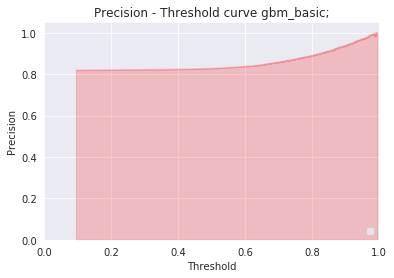

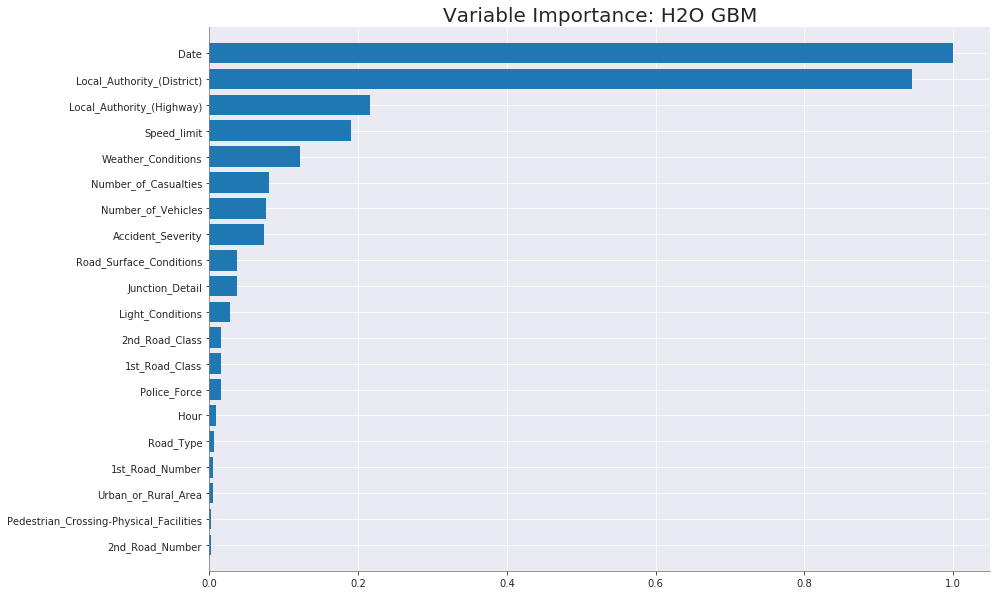

In [ ]:



################################################################################################
# real_v= pred_df.if_failed
real_v = test['if_failed'].as_data_frame().values
pred_gbm = model_gbm.predict(test)
p_yes_gbm = pred_gbm.as_data_frame()['p1']

# pred_gbm=draw_roc(test,model_gbm,False)

for t in range(100,800,5):
    cm = conf_m(t/1000., real_v, p_yes_gbm)
    tn, fp, fn, tp = cm.ravel()
    if (tp + fp) > 0:
        print('Accuracy = ', round((float(tp)+float(tn)) / (float(tp) + float(fp) + float(tn) + float(fn)), 3)*100)
        print('Precsision = ', round(float(tp) / (tp + fp), 3))
        print('Sensitivity = ', round(float(tp) / (tp + fn), 3))
        print('Threshold = ', round(t/1000., 3))
        print( cm)
    print(' \n ')


plot_confusion_matrix(0.645,real_v, p_yes_gbm, [0,1])

cm = conf_m(0.53068, real_v, p_yes_gbm)
tn, fp, fn, tp = cm.ravel()
if (tp + fp) > 0:
    print('Accuracy = ', round((float(tp) + float(tn)) / (float(tp) + float(fp) + float(tn) + float(fn)), 3) * 100)
    print('Precsision = ', round(float(tp) / (tp + fp), 3))
    print('Sensitivity = ', round(float(tp) / (tp + fn), 3))
    print('Threshold = ', round(0.692712, 3))
    print(cm)





In [ ]:
########################################################################################
# Run AutoML for 30 mins
aml = H2OAutoML(max_runtime_secs = 1800)
aml.train(x=predictors, y=response, training_frame= train, #validation_frame=val,
          leaderboard_frame = test)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb
#
pred_aml=draw_roc(test,aml.leader,False)


AutoML progress: |███